## Frequency-Domain Analysis of Multivariate Time Series

A standard tool for decomposing the cross-correlation between two time series in terms of frequency is the magnitude squared coherence and its accompanying phase. Magnitude squared coherence, if computed naively without smoothing, results in an estimate that is everywhere exactly unity. The multitaper analogue of magnitued squared coherence, outlined in Thomson and Chave (1991) show that jackknifing over cross-spectral estimates is an indispensable tool for producing magnitude squared coherences that do not require smoothing. 

For this notebook, we'll be examining the magnitude squared coherence and phase of a multivariate series, as well as coherences and transfer functions. Example 1.5 from the freely available text by Shumway and Stoffer ed 4., is used here. 

> The SOI and recruitment time series show "monthly values of an environmental series called the Southern Oscillation Index (SOI) and associated Recruitment (number of new fish) furnished by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries Group (personal communication). Both series are for a period of 453 months ranging over the years 1950–1987."

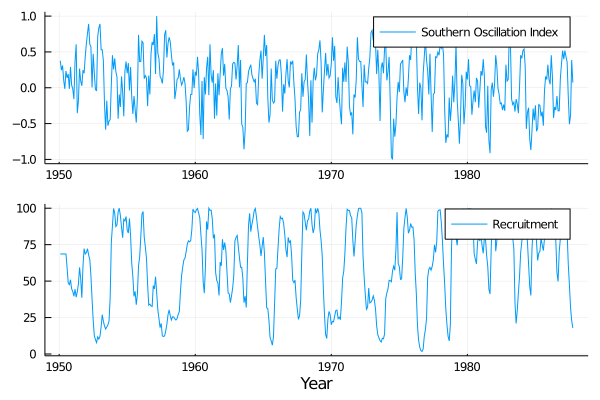

In [6]:
using DelimitedFiles, Multitaper, Plots
MTdir = dirname(dirname(pathof(Multitaper)))
dat   = readdlm(MTdir*"/Examples/data/soirecruitment.dat")

dt    = 1.0/12
dates = dat[:, 1] + dat[:, 2]*dt
soi   = dat[:, 3]
rec   = dat[:, 4]

p1    = plot(dates, soi, label = "Southern Oscillation Index", legend = :topright) 
p2    = plot(dates, rec, label = "Recruitment", legend = :topright, xlabel = "Year") 
plot(p1, p2, layout = (2, 1))

Compute the multitaper estimator of msc and phase. The function name is the same as in the univariate case, and many of the input options are similar. For the output keyword we could also have chosen <tt>outp = :spec</tt> for cross-spectrum or <tt>outp = :cspecqspec</tt> for cospectrum and quadrature spectrum, but here we just examine the squared coherence using <tt>outp = :coh</tt>.

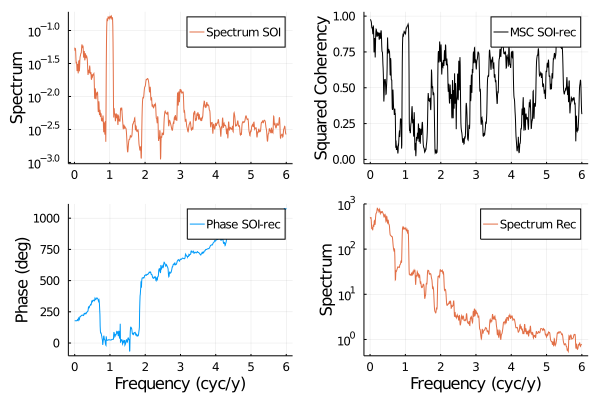

In [7]:
NW = 4.0 
K  = 6
S  = multispec(hcat(soi,rec), dt = dt, NW = NW, K = K, outp=:coh, pad = 4.0)

plot(S, label = ["Spectrum SOI" "MSC SOI-rec" "Phase SOI-rec" "Spectrum Rec"], 
    xlabel = ["" "" "Frequency (cyc/y)" "Frequency (cyc/y)"], 
    ylabel = ["Spectrum" "Squared Coherency" "Phase (deg)" "Spectrum"])

There is a lot of information plotted here. We have information from the two spectra, SOI in the top left and Recruitment in the bottom right. By default the plots recipe gives spectra in red, phases in blue, and MSC in black. If you were to give multispec a 3-column matrix it would assume that there are three time series with the same sampling for which you want to examine coherence and phase, so it would give a thre by three plot. 

Note the approximately linear phase characteristic that exists just about everywhere except over the interval near 1-2 cycles per year. This indicates a very simple delay mechanism between the two series. 

Note that the output variable S is now a tuple containing a vector of mtspec structs in the first entry, a matrix of MtCoh structs in the second entry, and an empty entry for where the result of a T-squared test for multiple lines would go if requested. The matrix of coherences contains entries only above the diagonal. This is for convenient plotting only.

In [8]:
typeof(S)

Tuple{Array{MtSpec{Ecoef,Nothing,Nothing},1},Array{MtCoh,2},Nothing}

Comparing with the plot from example (4.21) in the Shumway and Stoffer textbook, we see that the conventional estimate of the msc is pulled fairly close to its mean at 0.4 and also appears to have more variability. This is because the one in Shumway and Stoffer has been smoothed and this one has been jackknifed. The smoothing has the effect of bringing all of the estimate closer to its mean.

With multitaper, one also can assign significance to the squared coherence. Assuming that the true coherence is actually zero, the pdf is given in Thomson and Chave, and it depends on the degrees of freedom (here $2K$) as well as the significance level. The sigMax variable allows us to place a few of these levels on the plot.

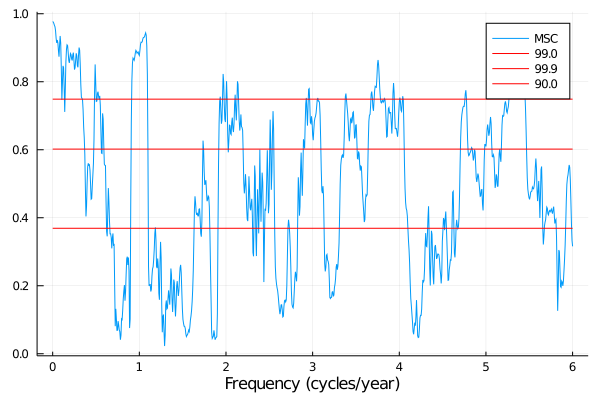

In [9]:
plot(S[2][1,2], yticks = 0:0.2:1.0, xlabel = "Frequency (cycles/year)", sigMax = 3)

Note that the MSC is rather high. But how high? Is it large enough for us to get excited about? Suppose the true coherence between the series is zero. What is the probability that the large values (near 1.0) that we see in our MSC estimate are spurious?

Since jackknifing gives us confidence intervals, let's add those to our plot. Note that the MSC becomes plotted on a transformed (arctanh) scale instead of the original scale. We can also add significance levels on the transformed scale.

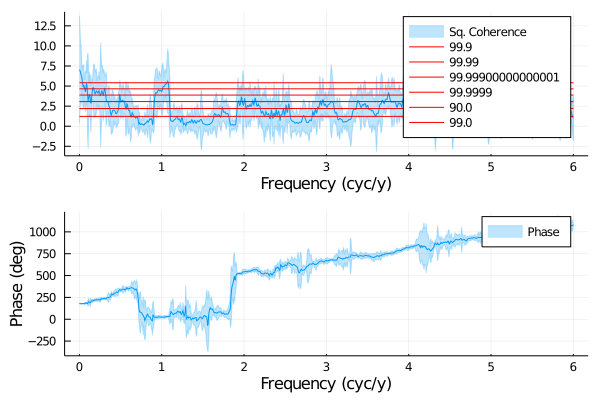

In [10]:
S = multispec(hcat(soi,rec), dt = dt, NW = NW, K = K, outp = :coh, pad = 4.0, jk = true)

plot(S[2][1,2], xlabel = "Frequency (cyc/y)", phase = true, sigMax = 6)

The Multitaper.jl function call as above can be used with more than two time series, and will generate pairwise magnitude squared coherences and spectrum estimates.

# References

Shumway, Robert H., and David S. Stoffer. Time series analysis and its applications: with R examples. Springer, 2017.

Thomson, David J. and Chave, A. D. "Jackknife error estimates for spectra, coherences, and transfer functions, Advances." Spectral Analysis and Array Processing (1991): 58-113.